# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_palette("deep")
# from warnings import filterwarnings
# filterwarnings("ignore")

In [16]:
df = pd.read_csv("Forbes+Richest+Athletes+1990-2019.csv")

In [17]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [18]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [19]:
df.shape

(291, 7)

### Q1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?
[Hint: use countplot]

In [28]:
df.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)'],
      dtype='object')

In [22]:
df['Nationality'].value_counts().head(1)

USA    200
Name: Nationality, dtype: int64

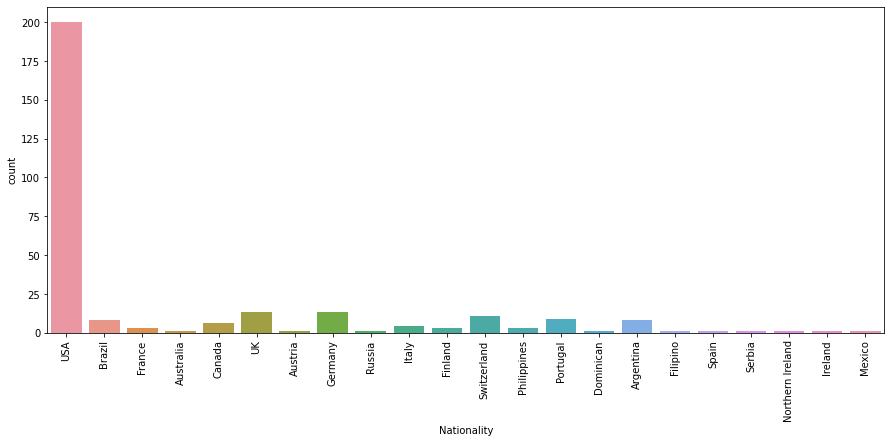

In [35]:
plt.figure(figsize= (15,6));
sns.countplot(df['Nationality']);
# Count Plot: Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
plt.xticks(rotation=90); #displays country names on the x-axis vertically
plt.show()

### Q2. Make a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?
[hint : use barplot]

In [27]:
df.sort_values(by='earnings ($ million)',ascending=False).head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,Floyd Mayweather,USA,1,>10,Boxing,2018,285.0
242,Manny Pacquiao,Philippines,2,>10,Boxing,2015,160.0
281,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
171,Tiger Woods,USA,1,1,Golf,2008,115.0


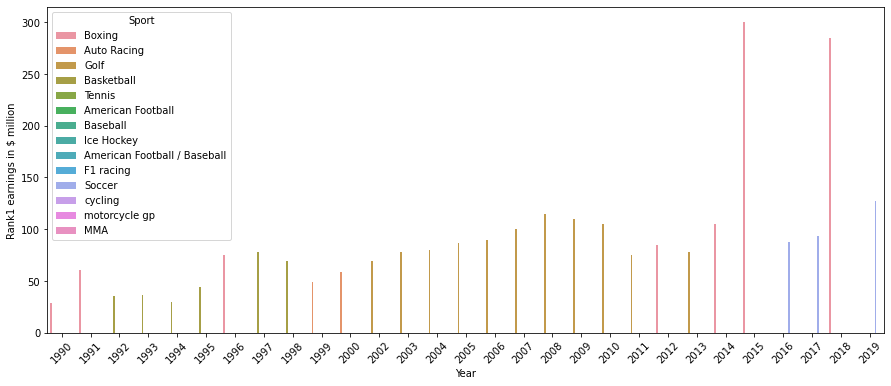

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(df[df['Current Rank']==1]['Year'],df['earnings ($ million)'],hue= df['Sport'])
plt.xticks(rotation=45)
plt.ylabel('Rank1 earnings in $ million')
plt.show();

### Q3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 
[Hint : use piechart]

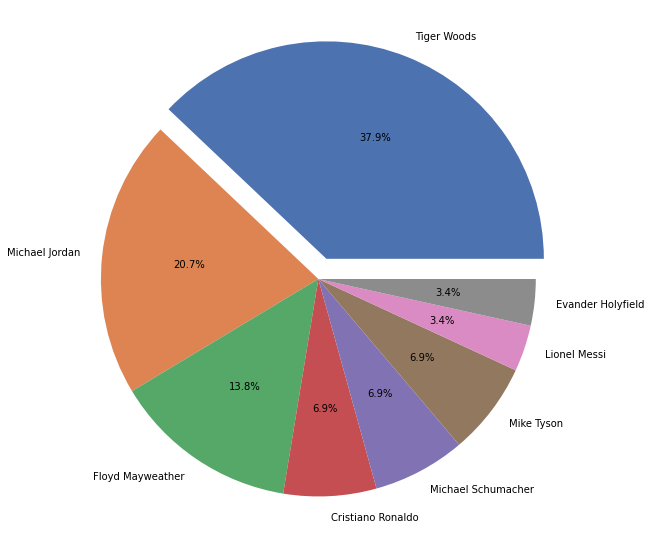

In [60]:
plt.figure(figsize=(10,10))
df_rank1= df[df['Current Rank']==1]
labels= df_rank1['Name'].value_counts().keys()
# autopct="%.1f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0] is used here to take the Tiger Woods portion little out(10%) of the pie-chart
plt.pie(df_rank1['Name'].value_counts(),explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct="%.1f%%",labels= labels);

### Q4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?
[Hint : Use swarmplot]

In [62]:
df.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)'],
      dtype='object')

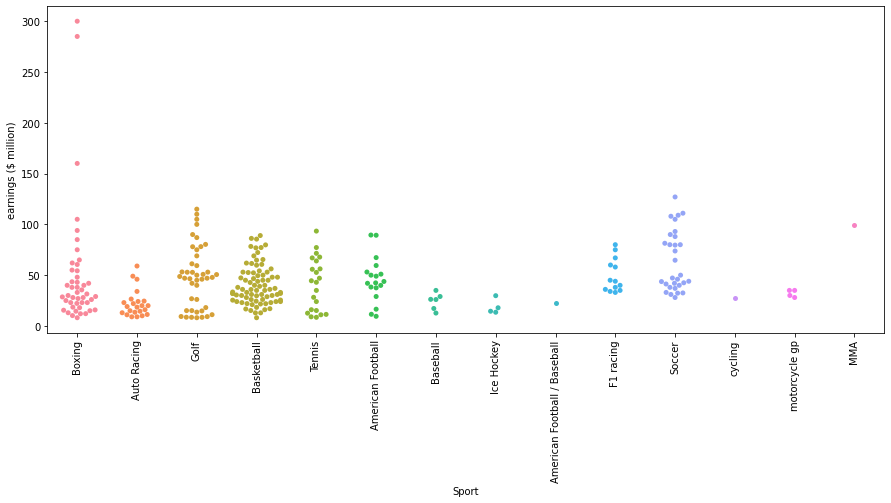

In [66]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.swarmplot(df['Sport'],df['earnings ($ million)']);

### Q5. Discuss the relationship between Current rank and earnings with the help of a suitable plot.
[hint : use regplot]

In [68]:
df.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)'],
      dtype='object')

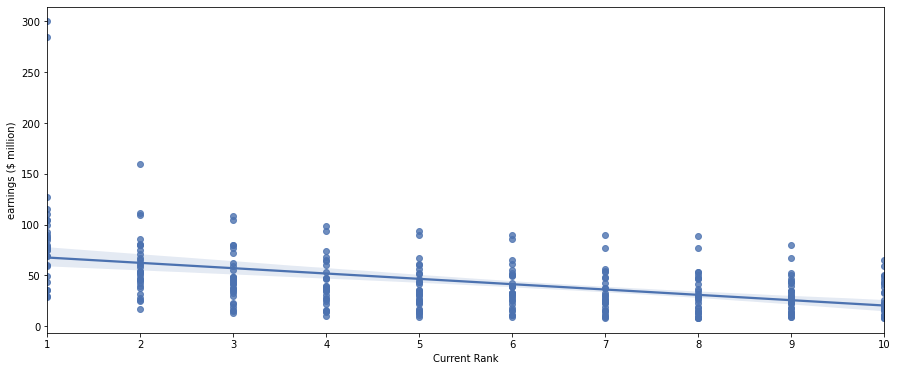

In [71]:
plt.figure(figsize=(15,6))
plt.xticks(np.arange(0,12))
sns.regplot(df['Current Rank'],df['earnings ($ million)']);
plt.show()

### Q6. Which three sports have the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot] In the box plot, a box is created from the first quartile to the third quartile, a verticle line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

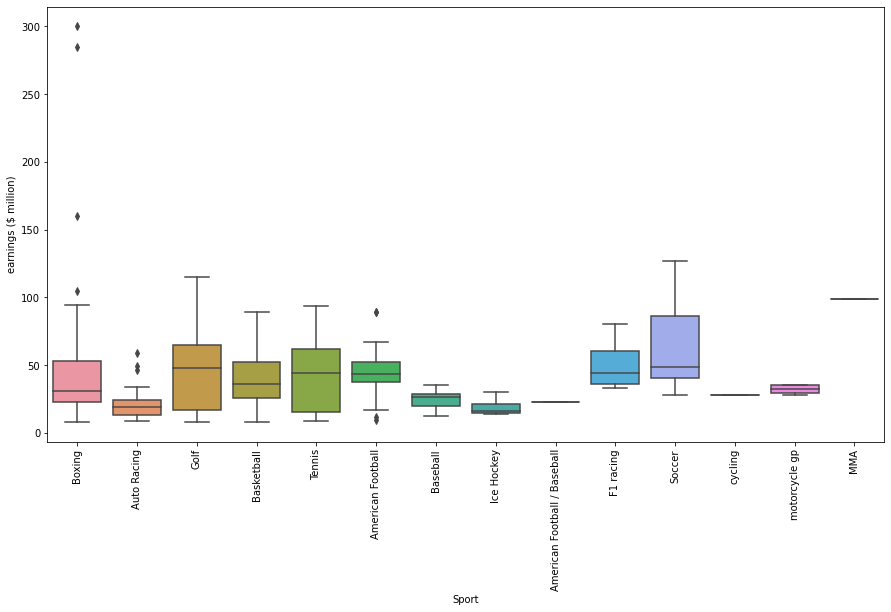

In [72]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(df['Sport'],df['earnings ($ million)'])
plt.show()

### Q7. Show a trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.
[Hint : Use lineplot]

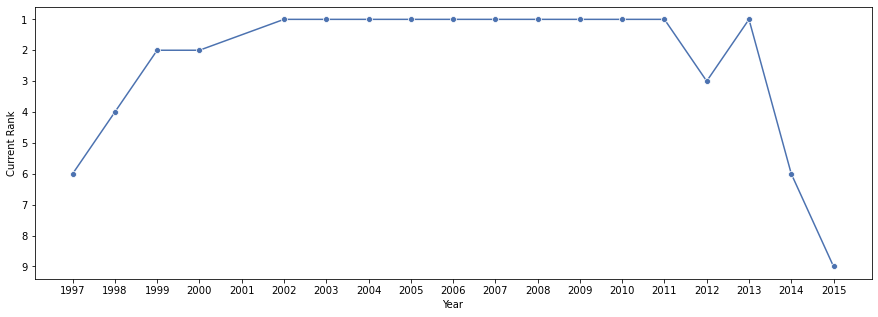

In [78]:
tigerW_df= df[df['Name']=='Tiger Woods']
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1996,2016))
sns.lineplot(tigerW_df['Year'], tigerW_df['Current Rank'],marker='o')
plt.gca().invert_yaxis()# This displays the Y-axis values in reverse order, other it would have been started from 1 to 9
plt.show();

### Q8. Comment on the trend of the earnings of Tiger Woods overs the years.
[Hint : use lineplot]

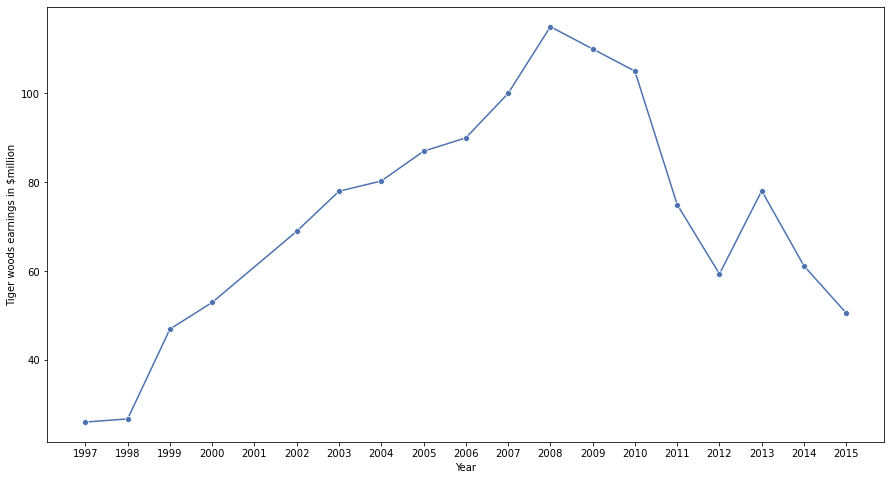

In [89]:
plt.figure(figsize=(15,8))
plt.xticks(np.arange(1996,2016))
plt.ylabel('Tiger woods earnings in $million')
# plt.gca().invert_yaxis()
sns.lineplot(tigerW_df['Year'],tigerW_df['earnings ($ million)'],marker ='o')
plt.show();

### Q9. Display the distribution of the earnings of Tiger Woods. Comment on how the distribution looks like and interpret some insights from the plot.
[Hint : Use distplot]

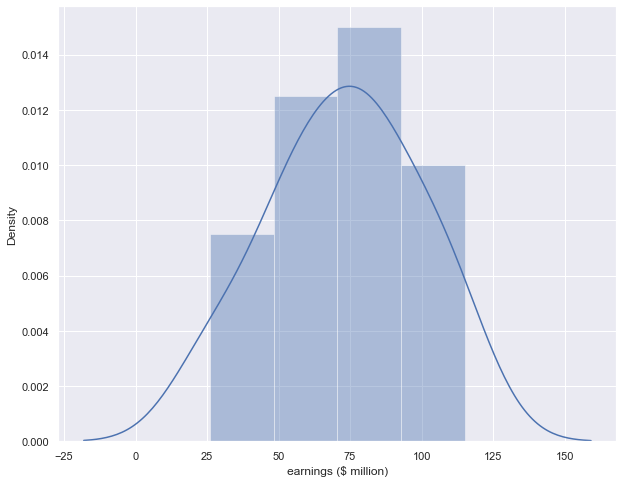

In [94]:
sns.set(color_codes=True)
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(tigerW_df['earnings ($ million)']);

In [95]:
tigerW_df['earnings ($ million)'].mean()

72.86111111111111

In [96]:
tigerW_df['earnings ($ million)'].medianian()

76.5

### Q10. Has the earnings of the richest athletes increased over the period of 30 years? Discuss the correlation between year and earnings.
[Hint : Use heatmap/scatterplot]

In [99]:
corr = df[['Year','earnings ($ million)']].corr();
corr

,Year,earnings ($ million)
Year,1.000000,0.638597
earnings ($ million),0.638597,1.000000


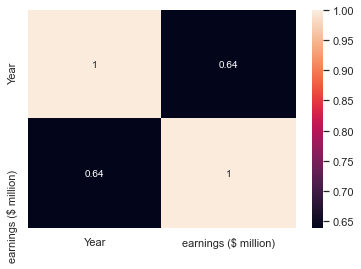

In [101]:
sns.heatmap(corr,annot=True);

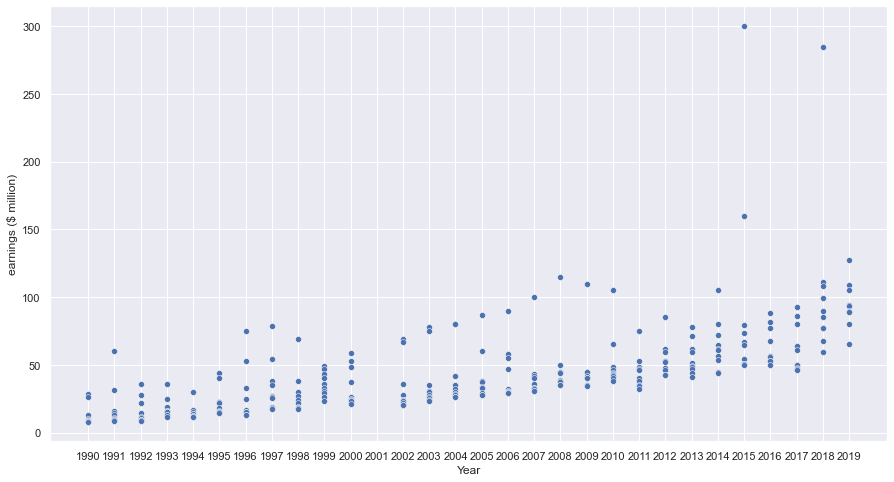

In [107]:
plt.figure(figsize=(15,8))
plt.xticks(np.arange(1990,2020))
sns.scatterplot(df['Year'],df['earnings ($ million)'])
plt.show();

### Q-11 Display the earnings trend over the years.
[Hint: use lineplot(), estimator = np.mean]

<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

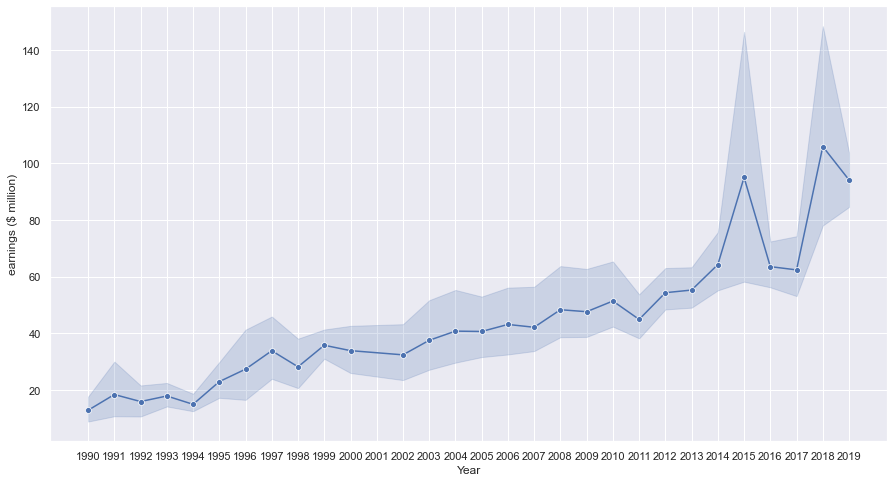

In [108]:
plt.figure(figsize=(15,8))
plt.xticks(np.arange(1990,2020))
sns.lineplot(df['Year'],df['earnings ($ million)'],marker='o');

                                            **Happy Learning**